# Atividade avaliativa - Desenvolvendo soluções de Machine Learning
**Atividade proposta** 

Desenvolver duas IAs que com base em um DataSet consigua identificar a probabilidade de um individuo vota em um dos partidos ('Direita', 'Centro-esquerda' ou 'Centro')

*Professor Dimmy Magalhães - dimmy.magalhaes@somosicev.com *

Para responder as atividade utilizei as estratégais KNN e um Classificador com base em uma Rede Neural, ambos da biblioteca SKLearn  

In [ ]:
# Importação de Bibliotecas que serão necessárias no decorrer da atividade
import pandas as pd 
import numpy as np 
import random
# procedimento para transformar os registros texto em números 
from sklearn.preprocessing import OneHotEncoder
# Importes das ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
# Para métrica  serão utilizados Accuracy e F1score(para classificadores) 
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
# para lidar com a divisão dos dados 
from sklearn.model_selection import StratifiedKFold

# Realiza a leitura do Arquivo
dados = pd.read_csv("dataset_eleitoral.csv", sep=";")

# Cria SEED padrão para futuros testes  
seed = random.randint(0, 2000)
print(f"Usando Seed = {seed}")
random.seed(seed)

# Visualizar as colunas importadas do arquivo 
dados.columns

Usando Seed = 1887


Index(['Unnamed: 0', 'ZONA', 'SEÇÃO', 'CD_MUNICIPIO', 'MUNICIPIO',
       'ANO_ELEICAO', 'UF', 'FEMININO', 'MASCULINO', 'GÊNERO NÃO INFORMADO',
       'CASADO', 'DIVORCIADO', 'ESTADO CIVIL NÃO INFORMADO',
       'SEPARADO JUDICIALMENTE', 'SOLTEIRO', 'VIÚVO', 'Idade 100 anos ou mais',
       'Idade 16 anos', 'Idade 17 anos', 'Idade 18 anos', 'Idade 19 anos',
       'Idade 20 anos', 'Idade 21 a 24 anos', 'Idade 25 a 29 anos',
       'Idade 30 a 34 anos', 'Idade 35 a 39 anos', 'Idade 40 a 44 anos',
       'Idade 45 a 49 anos', 'Idade 50 a 54 anos', 'Idade 55 a 59 anos',
       'Idade 60 a 64 anos', 'Idade 65 a 69 anos', 'Idade 70 a 74 anos',
       'Idade 75 a 79 anos', 'Idade 80 a 84 anos', 'Idade 85 a 89 anos',
       'Idade 90 a 94 anos', 'Idade 95 a 99 anos', 'Idade Inválido',
       'ANALFABETO', 'ENSINO FUNDAMENTAL COMPLETO',
       'ENSINO FUNDAMENTAL INCOMPLETO', 'ENSINO MÉDIO COMPLETO',
       'ENSINO MÉDIO INCOMPLETO', 'LÊ E ESCREVE', 'NÃO INFORMADO',
       'SUPERIOR COMPLETO',

In [ ]:
# Consultar qual é a divisão da quantidade de registros na coluna 'ESPECTRO POLITICO'
dados['ESPECTRO POLITICO'].value_counts()

Centro-esquerda    6245
Direita            2605
Centro               58
Name: ESPECTRO POLITICO, dtype: int64

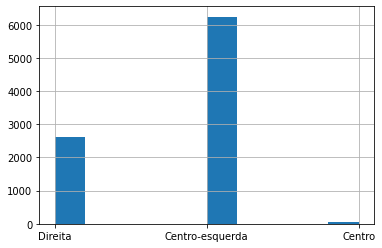

In [ ]:
# Exibir a mesma informação anterior, porém no formato de gráfico 
dados['ESPECTRO POLITICO'].hist()

In [ ]:
# Como durante a sondagem dos dados percebi que possuiamos dados não informados
# tive a curiosidade de ver o quanto eles representam 
dados.isnull().sum()

Unnamed: 0                          0
ZONA                                0
SEÇÃO                               0
CD_MUNICIPIO                        0
MUNICIPIO                           0
ANO_ELEICAO                         0
UF                                  0
FEMININO                            0
MASCULINO                           0
GÊNERO NÃO INFORMADO             8907
CASADO                              1
DIVORCIADO                        556
ESTADO CIVIL NÃO INFORMADO       8904
SEPARADO JUDICIALMENTE           2129
SOLTEIRO                            0
VIÚVO                             292
Idade 100 anos ou mais              0
Idade 16 anos                       0
Idade 17 anos                       0
Idade 18 anos                       0
Idade 19 anos                       0
Idade 20 anos                       0
Idade 21 a 24 anos                  0
Idade 25 a 29 anos                  0
Idade 30 a 34 anos                  0
Idade 35 a 39 anos                  0
Idade 40 a 4

In [ ]:
# Criei essa variavel somente para o código ficar mais legivel e menos repetitivo 
# estou excluído os campos com grande número de dados nulos 
colunas_escolhidas = [
    'ZONA', 'SEÇÃO', 'MUNICIPIO', 'FEMININO', 'MASCULINO',
    'CASADO', 'DIVORCIADO', 'SOLTEIRO', 'VIÚVO', 'Idade 100 anos ou mais',
    'Idade 16 anos', 'Idade 17 anos', 'Idade 18 anos', 'Idade 19 anos',
    'Idade 20 anos', 'Idade 21 a 24 anos', 'Idade 25 a 29 anos',
    'Idade 30 a 34 anos', 'Idade 35 a 39 anos', 'Idade 40 a 44 anos',
    'Idade 45 a 49 anos', 'Idade 50 a 54 anos', 'Idade 55 a 59 anos',
    'Idade 60 a 64 anos', 'Idade 65 a 69 anos', 'Idade 70 a 74 anos',
    'Idade 75 a 79 anos', 'Idade 80 a 84 anos', 'Idade 85 a 89 anos',
    'Idade 90 a 94 anos', 'Idade 95 a 99 anos', 'Idade Inválido',
    'ANALFABETO', 'ENSINO FUNDAMENTAL COMPLETO',
    'ENSINO FUNDAMENTAL INCOMPLETO', 'ENSINO MÉDIO COMPLETO',
    'ENSINO MÉDIO INCOMPLETO', 'LÊ E ESCREVE', 'NÃO INFORMADO',
    'SUPERIOR COMPLETO', 'SUPERIOR INCOMPLETO'
]

# a variável X define quais são os valores que o ML deverá utilizar para o aprendizado 
x = pd.DataFrame(data = dados[colunas_escolhidas], columns = colunas_escolhidas)

# já a coluna Y representa quais são os alvos ou respostas que o aprendizado deve alcançar 
y = pd.DataFrame(data = dados["ESPECTRO POLITICO"], columns = ['ESPECTRO POLITICO'])

#Para substituir possíveis valores NA executei esse comando para substituí-los por ZERO  
x.fillna(0, inplace=True)
y.fillna(0, inplace=True)


In [ ]:
# municipio é um dado de texto, redes neurais não trabalha com textos 
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ZONA                           8908 non-null   int64  
 1   SEÇÃO                          8908 non-null   int64  
 2   MUNICIPIO                      8908 non-null   object 
 3   FEMININO                       8908 non-null   float64
 4   MASCULINO                      8908 non-null   float64
 5   CASADO                         8908 non-null   float64
 6   DIVORCIADO                     8908 non-null   float64
 7   SOLTEIRO                       8908 non-null   float64
 8   VIÚVO                          8908 non-null   float64
 9   Idade 100 anos ou mais         8908 non-null   float64
 10  Idade 16 anos                  8908 non-null   float64
 11  Idade 17 anos                  8908 non-null   float64
 12  Idade 18 anos                  8908 non-null   f

In [ ]:
# Com base no comando anterior foi notado que a coluna "MUNICIPIO" está como "object" 
# As redes neurais, preferenciamente devem trabalhar com campos do tipo numérico,
# diante disso existe a necessidade de realizar essa transformação

enc = OneHotEncoder(handle_unknown="ignore")

# Vou pegar a coluna Município do DataFrame inicial 
municipios = pd.DataFrame(data = dados["MUNICIPIO"], columns = ['MUNICIPIO'])
enc.fit(municipios)

# Vou criar um novo dataframe com os municípios 
# o comando enc.transform(municipios).toarray() retorna um array de valores 
# o comando enc.categories_ retorna o titulo das colunas 
df_municipios = pd.DataFrame(enc.transform(municipios).toarray(), columns = enc.categories_)

# apenas para visualizar a conversão
df_municipios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Columns: 221 entries, ('ACAUÃ',) to ('ÁGUA BRANCA',)
dtypes: float64(221)
memory usage: 15.0 MB


In [ ]:
# Diante disso vou remover a coluna município 
colunas_escolhidas = [
    'ZONA', 'SEÇÃO', 'FEMININO', 'MASCULINO', 
    'CASADO', 'DIVORCIADO', 'SOLTEIRO', 'VIÚVO', 'Idade 100 anos ou mais',
    'Idade 16 anos', 'Idade 17 anos', 'Idade 18 anos', 'Idade 19 anos',
    'Idade 20 anos', 'Idade 21 a 24 anos', 'Idade 25 a 29 anos',
    'Idade 30 a 34 anos', 'Idade 35 a 39 anos', 'Idade 40 a 44 anos',
    'Idade 45 a 49 anos', 'Idade 50 a 54 anos', 'Idade 55 a 59 anos',
    'Idade 60 a 64 anos', 'Idade 65 a 69 anos', 'Idade 70 a 74 anos',
    'Idade 75 a 79 anos', 'Idade 80 a 84 anos', 'Idade 85 a 89 anos',
    'Idade 90 a 94 anos', 'Idade 95 a 99 anos', 'Idade Inválido',
    'ANALFABETO', 'ENSINO FUNDAMENTAL COMPLETO',
    'ENSINO FUNDAMENTAL INCOMPLETO', 'ENSINO MÉDIO COMPLETO',
    'ENSINO MÉDIO INCOMPLETO', 'LÊ E ESCREVE', 'NÃO INFORMADO',
    'SUPERIOR COMPLETO', 'SUPERIOR INCOMPLETO'
]
# Recriar o dataframe sem a coluna município 
x = pd.DataFrame(data = dados[colunas_escolhidas], columns = colunas_escolhidas)

In [ ]:
# Unir o novo dataframe x com o data frame do municipios
x = pd.concat([x, df_municipios], axis=1)
# remove novamente os NA caso existam 
x.fillna(0, inplace=True)

In [ ]:
#
# Depois que rodei o script por completo tentei realizar otimizações, e 
# verifiquei se eu agrupar as idades com conjuntos a IA teria maior 
# assertividade, tradicionalmente, uma população é dividida em 
# três faixas etárias: 
# Jovens - Indivíduos de até 19 anos; 
# Adultos - Indivíduos com idade entre 20 até 59 anos; 
# Idosos - Indivíduos de 60 anos em diante
# Para isso eu fiz
#
jovens = dados["Idade 16 anos"]+dados['Idade 17 anos'] 

adultos = dados['Idade 18 anos']+dados['Idade 19 anos']+ \
    dados['Idade 20 anos']+dados['Idade 21 a 24 anos']+ \
    dados['Idade 25 a 29 anos']+dados['Idade 30 a 34 anos']+ \
    dados['Idade 35 a 39 anos']+dados['Idade 40 a 44 anos']+ \
    dados['Idade 45 a 49 anos']+dados['Idade 50 a 54 anos']+ \
    dados['Idade 55 a 59 anos']

idosos = dados['Idade 60 a 64 anos']+dados['Idade 65 a 69 anos']+ \
    dados['Idade 70 a 74 anos']+dados['Idade 75 a 79 anos']+ \
    dados['Idade 80 a 84 anos']+dados['Idade 85 a 89 anos']+ \
    dados['Idade 90 a 94 anos']+dados['Idade 95 a 99 anos']

colunas_escolhidas = [
    'ZONA', 'SEÇÃO', 'FEMININO', 'MASCULINO', 
    'CASADO', 'DIVORCIADO', 'SOLTEIRO', 'VIÚVO', 'Idade 100 anos ou mais',
    'Idade Inválido',
    'ANALFABETO', 'ENSINO FUNDAMENTAL COMPLETO',
    'ENSINO FUNDAMENTAL INCOMPLETO', 'ENSINO MÉDIO COMPLETO',
    'ENSINO MÉDIO INCOMPLETO', 'LÊ E ESCREVE', 'NÃO INFORMADO',
    'SUPERIOR COMPLETO', 'SUPERIOR INCOMPLETO'
]
x = pd.DataFrame(data = dados[colunas_escolhidas], columns = colunas_escolhidas)

# Concatenando com municípios 
x = pd.concat([x, df_municipios], axis=1)

# Concatenando com as idades 
x = pd.concat([x, jovens], axis=1)
x = pd.concat([x, adultos], axis=1)
x = pd.concat([x, idosos], axis=1)

x.fillna(0, inplace=True)

In [ ]:
# A coluna alvo (target) também lida com valores tipo texto, 
# porem como são apenas 3 categorias farei substituição simples com replace 

dados['ESPECTRO POLITICO'] = dados['ESPECTRO POLITICO'].replace('Direita',0)
dados['ESPECTRO POLITICO'] = dados['ESPECTRO POLITICO'].replace('Centro-esquerda',1)
dados['ESPECTRO POLITICO'] = dados['ESPECTRO POLITICO'].replace('Centro',2)

# Criação do novo dataframe com os targets 
y = dados['ESPECTRO POLITICO']

# Preparação para rodar as IAs 

In [ ]:
# Utilizarei o StratifiedKFold para manter a proporção dos dados 
#  Visto que os dados estão desbalanceados 
n_folds = 5 
execucoes = 5
n_vizinhos = 3

# Linha necessária para manter as proporções de classes
skf = StratifiedKFold(n_splits=n_folds, shuffle=True)

# armazenar nos resultados 
lista_f1_scores_knn = []
lista_f1_scores_classifier = []

# Durante a execução do código foram exibidas diversas mensagems de Warnings 
# relacionadas com "FutureWarning", as duas linhas abaixo desativam as mensagens 
# de alerta relacionadas a "FutureWarning" 
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Preencher os folders
index = 0
for train_index, val_index in skf.split(x, y):
  x_train = x.iloc[train_index, :] 
  x_test = x.iloc[val_index, :]
  y_train = y.iloc[train_index]
  y_test = y.iloc[val_index]
  index=index+1
  print(f"Folder nº {index}")

  # Para cada folder irei rodar uma estratégia de ML 
  for run in range(execucoes):
    print(f"           Execução nº {run+1}")

    #
    # Primeira estratégia o KNN 
    #
    modelo_knn = KNeighborsClassifier(n_neighbors=n_vizinhos)
    modelo_knn.fit(x_train, y_train.values.ravel())

    val_preds_knn = modelo_knn.predict(x_test)
    
    # Acumula os valores 
    lista_f1_scores_knn.append(f1_score(y_test, val_preds_knn, average="weighted"))


    #
    # Segunda estratégia Regressão
    # 
    model_classifier = MLPClassifier(max_iter=1000, tol=0.0000100)
    # Max_iter = limite de épocas 
    # tol=0.0000100 = Definindo o limite de tolerancia, pois ele pode não executar
    # até o limite de MAX_INTER se a variação de erro padrão for atingida
    model_classifier.fit(x_train, y_train.values.ravel())
    previsoes = model_classifier.predict(x_test)

    lista_f1_scores_classifier.append(f1_score(y_test, previsoes, average="weighted" ))

print("Finalizado")

Folder nº 1
           Execução nº 1
           Execução nº 2
           Execução nº 3
           Execução nº 4
           Execução nº 5
Folder nº 2
           Execução nº 1
           Execução nº 2
           Execução nº 3
           Execução nº 4
           Execução nº 5
Folder nº 3
           Execução nº 1
           Execução nº 2
           Execução nº 3
           Execução nº 4
           Execução nº 5
Folder nº 4
           Execução nº 1
           Execução nº 2
           Execução nº 3
           Execução nº 4
           Execução nº 5
Folder nº 5
           Execução nº 1
           Execução nº 2
           Execução nº 3
           Execução nº 4
           Execução nº 5
Finalizado


In [ ]:
# Realizando os calculos 
acuracias_knn = np.array(lista_f1_scores_knn)
acuracia_knn = acuracias_knn.mean()  # médias
acuracia_knn_std = acuracias_knn.std() # desvio
print(f"Para o modelo KNN a média da acurácia foi {round(acuracia_knn*100,2)}% e o desvio padrão foi {round(acuracia_knn_std,2)}")

acuracias_classifier = np.array(lista_f1_scores_classifier)
acuracias_classifier_mean = acuracias_classifier.mean()
acuracias_classifier_std = acuracias_classifier.std()
print(f"Para o modelo ML Classificação a média da acurária foi {round(acuracias_classifier_mean*100,2)}% com  desvio padrão de {round(acuracias_classifier_std,2)}")


Para o modelo KNN a média da acurácia foi 78.09% e o desvio padrão foi 0.01
Para o modelo ML Classificação a média da acurária foi 84.98% com  desvio padrão de 0.02


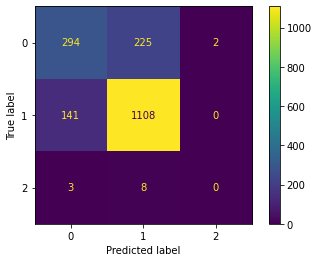

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(modelo_knn, x_test, y_test) 

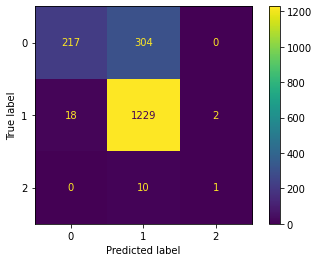

In [ ]:
plot_confusion_matrix(model_classifier, x_test, y_test) 